In [1]:
import jax
import seaborn as sns
from sklearn.datasets import make_blobs

from kmeans import KMeans
from metrics import SilhouetteScore
from viz import plot_clusters2d
# from data import SyntheticClusters

sns.set_theme()

# Setup

In this step we defin some hyper-parameters like the number of clusters in our fake dataset, the number of features each sample has. We also set the random seed to make our results reproducible and configure the total number of samples our dataset will have. 

In [2]:
centers = jax.numpy.asarray([[1, 1], [3, 3], [1, 5]])
cluster_std = jax.numpy.asarray([0.5, 0.5, 0.6])
# synth_clusters = SyntheticClusters(
#     n_samples_per_cluster=50,
#     n_features=2,
#     cluster_centers=centers,
#     cluster_std=cluster_std,
#     random_seed=42
# )

data, labels = make_blobs(n_samples=200, n_features=2, centers=centers, cluster_std=cluster_std)
# data, labels = synth_clusters.generate()

In [3]:
# plot_clusters2d(data, labels, centroid_coords=centers)

# Initialize Our K-Means Algorithm

In [4]:
kmeans = KMeans(n_clusters=3, random_seed=1000)
kmeans.initialize(data)
print(kmeans.cluster_centroids)
print(kmeans.compute_wcss(data))

[[ 0.8212653  1.0700855]
 [-0.1280353  1.8441448]
 [ 6.0357056  1.442385 ]]
[389.8996]


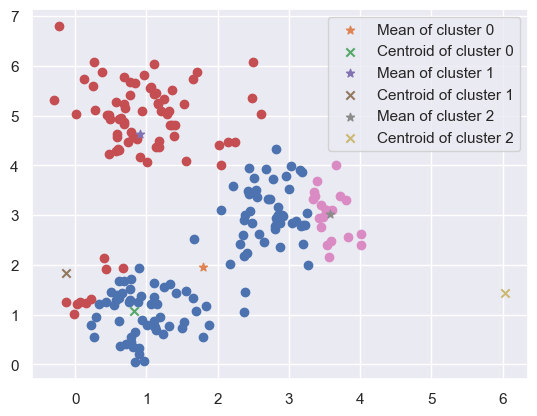

In [5]:
plot_clusters2d(
    data, 
    kmeans.predict(data), 
    centroid_coords=kmeans.cluster_centroids
)

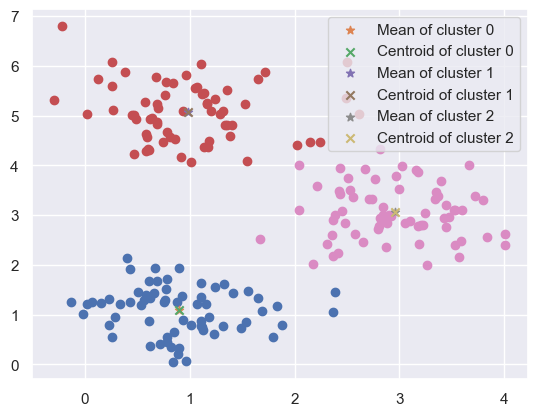

In [6]:
wcss = kmeans.update(data, n_iterations=10)
plot_clusters2d(data, kmeans.predict(data), centroid_coords=kmeans.cluster_centroids)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


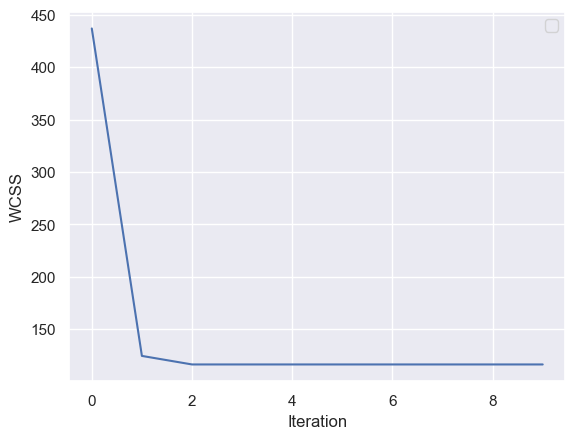

In [7]:
from matplotlib import pyplot as plt
plt.plot(wcss)
plt.xlabel("Iteration")
plt.ylabel("WCSS")
plt.legend()

In [8]:
sil_score = SilhouetteScore(return_mean=False)

In [10]:
scores = sil_score(data, kmeans.predict(data))